# Lecture 2 - Exploratory Data Analysis of the Use Table  

This tutorial we use the U15 USA use tables and perform some analysis: 

Last week, we looked at the Supply Table for the US. Online, you find a Jupyter Notebook which imports the Supply Table, parses it (i.e., creates a variable that describes the part of the downloaded data that is of interest), and performs the sums to anser the questions. Please make sure you understand these operations. 
    
In the first part of the present exercise, we import the US Use Table and prepare it for subsequent analysis by separating out relevant, distinct parts (parsing). Then we do some exploratory data analysis to get to know the use table. 

Like the supply table, the published use table comes with various sums of columns and rows. We are only interested in the primary data; python can do summations and so we do not need to have the data summed. Further, the use table has  distinct blocks: <br> 
    - the use of commodities as intermediate input by industries,  
    - the use of factors of production (components of value added) by these industries, and  
    - the use of commodities by final demand, which includes final consumption by households, non-governmental institutions serving households, the government, as well as export, investment, and storage.  
    We identify those block and form the tables Use, Value Added, and FinalDemand. _Examine these tables and identify large flows_.<br><br> 
    <i>Q1: What is the sum total of each of those three matrices?</i><br>
    <i>Q2: Determine and plot the total operating surplus of each industry sector.</i> What can we conclude from this? Why do you think it is called total operating surplus? What do costs do you think this surplus needs to cover? How is it different from profit?  
    _Q3: Plot the compensation of employees_. How does the sector distribution differ from that of the surplus?  
_Q4: Determine and plot the share of operating surplus in the value added in each sector._  
    _Q5: What industries are using agricultural products as intermediate inputs? Make a plot._  
    _Q6: Calculate the input coefficients (inputs per unit industry turnover). What commodities are used by all industries?_  
    _Q7: Compare the demand for commodities by industry with the final demand._ Which commodities are primarily used by industries? Which are predominantly used by final consumers?
    

In [1]:

# US Supply and Use Tables from url = "https://www.bea.gov/industry/input-output-accounts-data"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

UseTable = pd.read_csv("data/U15_US_2021.csv", header=3, index_col=1, na_values='---').drop('Unnamed: 0', axis=1)   
        #You may have to add a path to the file name

In [2]:
UseTable

,"Agriculture, forestry, fishing, and hunting",Mining,Utilities,Construction,Manufacturing,Wholesale trade,Retail trade,Transportation and warehousing,Information,"Finance, insurance, real estate, rental, and leasing",...,"Arts, entertainment, recreation, accommodation, and food services","Other services, except government",Government,Total Intermediate,Personal consumption expenditures,Private fixed investment,Change in private inventories,Exports of goods and services,Government consumption expenditures and gross investment,Total use of products
Name,,,,,,,,,,,,,,,,,,,,,
"Agriculture, forestry, fishing, and hunting",131951.0,205.0,NaN,4938.0,361145.0,1905.0,4429.0,165.0,NaN,7.0,...,13510.0,305.0,8934.0,530936,206441.0,NaN,-6895.0,84924.0,NaN,815406.0
Mining,2295.0,82369.0,54149.0,33376.0,414870.0,62.0,40.0,247.0,1733.0,622.0,...,1461.0,932.0,35971.0,631676,61.0,79979.0,439.0,127875.0,NaN,840031.0
Utilities,5092.0,10752.0,42391.0,7645.0,57740.0,22971.0,51091.0,20610.0,7365.0,149311.0,...,38791.0,4022.0,38179.0,499094,306712.0,NaN,NaN,3573.0,NaN,809379.0
Construction,1685.0,3236.0,8097.0,275.0,12455.0,2351.0,5398.0,7194.0,2747.0,184213.0,...,2992.0,3689.0,106772.0,344569,NaN,1339778.0,NaN,115.0,367192.0,2051653.0
Manufacturing,133667.0,95986.0,46886.0,733173.0,2379870.0,118487.0,116511.0,163025.0,120872.0,116028.0,...,174626.0,72546.0,582477.0,5400196,4680651.0,1297203.0,-6454.0,1135707.0,148409.0,12655713.0
Wholesale trade,1396.0,195.0,1637.0,114.0,25852.0,56193.0,30802.0,316.0,3050.0,11346.0,...,169.0,40.0,42.0,132127,NaN,NaN,NaN,2805.0,NaN,134933.0
Retail trade,NaN,NaN,NaN,NaN,NaN,NaN,3994.0,NaN,NaN,NaN,...,NaN,19.0,NaN,4012,10275.0,NaN,NaN,NaN,NaN,14288.0
Transportation and warehousing,609.0,2880.0,14597.0,699.0,50890.0,97486.0,104559.0,189688.0,20779.0,24431.0,...,8437.0,5084.0,40103.0,639850,214082.0,NaN,NaN,44254.0,NaN,898185.0
Information,417.0,1672.0,4516.0,10050.0,20332.0,27421.0,34166.0,19435.0,263770.0,63981.0,...,24481.0,17129.0,112175.0,797565,706747.0,319225.0,7200.0,77011.0,20990.0,1928738.0


Examine the sections of the table by checking the row and column names. If this does not show well on your PC, do so in the Excel version of the table. (PS: Please note that the drop command below just serves to delete the column of sector numbers).

Define the intermediate use (by industries) of commodites. The second line defines the number of digit after the comma. fillna(0) replaced Nan by zero. The last command formats the background of the table in colors depending on the size of the value. Please examine these tables.

In [3]:
Use=UseTable.iloc[0:16,1:15]             #Use of commodities by industries
pd.set_option('display.precision', 0)
Use.fillna(0).style.background_gradient(cmap ='Blues')

,Mining,Utilities,Construction,Manufacturing,Wholesale trade,Retail trade,Transportation and warehousing,Information,"Finance, insurance, real estate, rental, and leasing",Professional and business services,"Educational services, health care, and social assistance","Arts, entertainment, recreation, accommodation, and food services","Other services, except government",Government
Name,,,,,,,,,,,,,,
"Agriculture, forestry, fishing, and hunting",205.000000,0.000000,4938.000000,361145.000000,1905.000000,4429.000000,165.000000,0.000000,7.000000,3161.000000,279.000000,13510.000000,305.000000,8934.000000
Mining,82369.000000,54149.000000,33376.000000,414870.000000,62.000000,40.000000,247.000000,1733.000000,622.000000,2916.000000,633.000000,1461.000000,932.000000,35971.000000
Utilities,10752.000000,42391.000000,7645.000000,57740.000000,22971.000000,51091.000000,20610.000000,7365.000000,149311.000000,22494.000000,20639.000000,38791.000000,4022.000000,38179.000000
Construction,3236.000000,8097.000000,275.000000,12455.000000,2351.000000,5398.000000,7194.000000,2747.000000,184213.000000,2043.000000,1421.000000,2992.000000,3689.000000,106772.000000
Manufacturing,95986.000000,46886.000000,733173.000000,2379870.000000,118487.000000,116511.000000,163025.000000,120872.000000,116028.000000,270208.000000,275834.000000,174626.000000,72546.000000,582477.000000
Wholesale trade,195.000000,1637.000000,114.000000,25852.000000,56193.000000,30802.000000,316.000000,3050.000000,11346.000000,363.000000,611.000000,169.000000,40.000000,42.000000
Retail trade,0.000000,0.000000,0.000000,0.000000,0.000000,3994.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000,0.000000
Transportation and warehousing,2880.000000,14597.000000,699.000000,50890.000000,97486.000000,104559.000000,189688.000000,20779.000000,24431.000000,61659.000000,17949.000000,8437.000000,5084.000000,40103.000000
Information,1672.000000,4516.000000,10050.000000,20332.000000,27421.000000,34166.000000,19435.000000,263770.000000,63981.000000,153464.000000,44556.000000,24481.000000,17129.000000,112175.000000


In [4]:
ValueAdded=UseTable.iloc[18:21,1:15]                     #Use of Factors of Production by industry
ValueAdded.style.background_gradient(cmap ='Blues')

,Mining,Utilities,Construction,Manufacturing,Wholesale trade,Retail trade,Transportation and warehousing,Information,"Finance, insurance, real estate, rental, and leasing",Professional and business services,"Educational services, health care, and social assistance","Arts, entertainment, recreation, accommodation, and food services","Other services, except government",Government
Name,,,,,,,,,,,,,,
Compensation of employees,67307.000000,93294.000000,635566.000000,1183656.000000,605994.000000,745483.000000,457113.000000,507857.000000,1179563.000000,2242330.000000,1670227.000000,538307.000000,350173.000000,2210905.000000
Other taxes on production,32872.000000,39202.000000,10699.000000,68527.000000,15335.000000,26430.000000,20719.000000,18735.000000,382081.000000,32266.000000,39281.000000,19831.000000,12331.000000,nan
Less: Other subsidies on production,3336.000000,591.000000,34882.000000,30937.000000,11163.000000,23078.000000,32508.000000,7092.000000,10813.000000,41156.000000,58742.000000,95947.000000,19574.000000,nan


In [5]:
FinalDemand=UseTable.iloc[0:16,17:22]
#Have a look at the table. Identify the largest final demand category for each commodity. (Just note, no need to report.)

**Q1: What is the sum total of those three matrices?**  
Please also print out the total volume of value added and final demand. The Use table is in million US dollars. 

In [6]:
Use_Total = Use.sum().sum()

print('Total use of commodities by industries:', Use_Total/1000000, ' trillion dollars')
# print the sums in trillions for the two other matrices. Why did we have to sum twice?

Total use of commodities by industries: 17.636516  trillion dollars


<AxesSubplot:ylabel='None'>

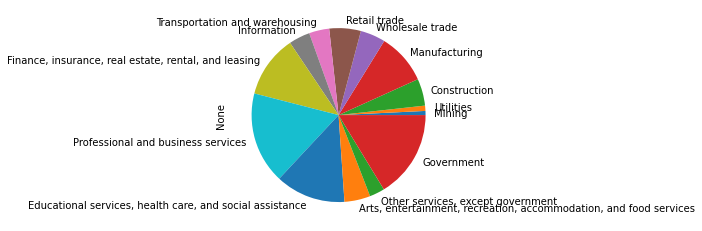

In [7]:
#How do you like this figure? Why do we need to sum only once? What happens if we write (axis=1) after sum?
ValueAdded.sum().plot(kind='pie')

**Q2: Determine and plot the total operating surplus of each industry sector.**

In [8]:
(ValueAdded/1000).loc['Gross operating surplus'].plot(kind='hbar',xlabel='Surplus in billion $')

KeyError: 'Gross operating surplus'

**Q3: Determine and plot the compensation of employees.**

**Q4: Determine and plot the share of operating surplus in the value added in each sector.**

In [ ]:
SurplusShareVA=ValueAdded.loc['Gross operating surplus']/ValueAdded.sum()
SurplusShareVA.plot(kind='bar', ylabel="Surplus per unit Value Added")

**Q5: What industries are using agricultural products as intermediate inputs? Make a plot.**

**Q6: Calculate the input coefficients (inputs per unit industry turnover).** What commodities are used by all industries?

In [ ]:
IndustryTotalInput = Use.sum() + ValueAdded.sum()
IndustryTotalInput.plot(kind='pie')

In [ ]:
##Fill in here:
Use_coefficient # = ...
pd.set_option('display.precision', 2)
Use_coefficient.fillna(0).style.background_gradient(cmap ='Blues')

In [ ]:
print('Following commodities are used by all industries: (fill in here)')

**Q7: Compare the demand for commodities by industry with the final demand.**     
Which commodities are primarily used by industries? Which are predominantly used by final consumers?

In [ ]:
df1=pd.DataFrame(data=Use.sum(axis=1), columns=['Intermediate'])
df2=pd.DataFrame(data=FinalDemand.sum(axis=1), columns=['Final'])
CommodityDemand=df1.merge(df2, on='Name')
(CommodityDemand/1000000).plot(kind='bar',stacked=True, ylabel='Commodity demand trillion $')

In [ ]:
CommodityDemand.sum().plot(kind='pie')

In [ ]:
CommodityDemand.plot(kind='scatter', x='Intermediate', y='Final')

Write your interpretation of the results in Q7 here: